In [ ]:
!pip install accelerate==1.4.0 aiohappyeyeballs==2.5.0 aiohttp==3.11.13 aiosignal==1.3.2 bitsandbytes==0.45.3 datasets==3.3.2 deepspeed==0.16.4 evaluate==0.4.3 huggingface-hub==0.29.2 ollama==0.4.7 peft==0.14.0 torch==2.6.0 tqdm==4.67.1


  Using cached accelerate-1.4.0-py3-none-any.whl.metadata (19 kB)
  Using cached aiohappyeyeballs-2.5.0-py3-none-any.whl.metadata (5.9 kB)
  Using cached aiohttp-3.11.13-cp310-cp310-win_amd64.whl.metadata (8.0 kB)
  Using cached aiosignal-1.3.2-py2.py3-none-any.whl.metadata (3.8 kB)
  Using cached bitsandbytes-0.45.3-py3-none-win_amd64.whl.metadata (5.1 kB)
  Using cached datasets-3.3.2-py3-none-any.whl.metadata (19 kB)
  Using cached deepspeed-0.16.4-cp310-cp310-win_amd64.whl.metadata (46 kB)
  Using cached evaluate-0.4.3-py3-none-any.whl.metadata (9.2 kB)
  Using cached huggingface_hub-0.29.2-py3-none-any.whl.metadata (13 kB)
  Using cached ollama-0.4.7-py3-none-any.whl.metadata (4.7 kB)
  Using cached peft-0.14.0-py3-none-any.whl.metadata (13 kB)
  Using cached torch-2.6.0-cp310-cp310-win_amd64.whl.metadata (28 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached safetensors-0.5.3-cp38-abi3-win_amd64.whl.metadata (3.9 kB)
  Using cached async_timeout-5.0.1

In [ ]:
!pip uninstall torch torchvision torchaudio -y
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

Found existing installation: torch 2.6.0
Uninstalling torch-2.6.0:
  Successfully uninstalled torch-2.6.0


You can safely remove it manually.


Looking in indexes: https://download.pytorch.org/whl/cu121
     ---------------------------------------- 0.0/2.4 GB ? eta -:--:--
     ---------------------------------------- 0.0/2.4 GB 50.3 MB/s eta 0:00:49
     ---------------------------------------- 0.0/2.4 GB 57.7 MB/s eta 0:00:43
      --------------------------------------- 0.0/2.4 GB 62.7 MB/s eta 0:00:39
      --------------------------------------- 0.0/2.4 GB 60.2 MB/s eta 0:00:40
     - -------------------------------------- 0.1/2.4 GB 61.1 MB/s eta 0:00:40
     - -------------------------------------- 0.1/2.4 GB 61.9 MB/s eta 0:00:39
     - -------------------------------------- 0.1/2.4 GB 62.6 MB/s eta 0:00:38
     - -------------------------------------- 0.1/2.4 GB 60.7 MB/s eta 0:00:39
     - -------------------------------------- 0.1/2.4 GB 60.8 MB/s eta 0:00:39
     - -------------------------------------- 0.1/2.4 GB 59.9 MB/s eta 0:00:39
     -- ------------------------------------- 0.1/2.4 GB 58.1 MB/s eta 0:00:40
 

In [1]:
import torch
print("CUDA Available:", torch.cuda.is_available())
print("GPU Count:", torch.cuda.device_count())
print("GPU Name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU detected")
print("CUDA Version:", torch.version.cuda)

CUDA Available: True
GPU Count: 1
GPU Name: NVIDIA GeForce RTX 3060 Laptop GPU
CUDA Version: 12.1


In [ ]:
import requests
import json

url = "http://localhost:11434/api/generate"

data = {
    "model": "llama3",
    "prompt": "Write a SQL Query to retrieving Managers from Employee table",
}

response = requests.post(
    url, json=data, stream=True
)  # remove the stream=True to get the full response


# check the response status
if response.status_code == 200:
    print("Generated Text:", end=" ", flush=True)
    # Iterate over the streaming response
    for line in response.iter_lines():
        if line:
            # Decode the line and parse the JSON
            decoded_line = line.decode("utf-8")
            result = json.loads(decoded_line)
            # Get the text from the response
            generated_text = result.get("response", "")
            print(generated_text, end="", flush=True)
else:
    print("Error:", response.status_code, response.text)

Generated Text: Here is an example of how you can retrieve managers from the Employee table using SQL:
```sql
-- Select all employees where the manager_id is NULL (i.e., the employee is a manager)
SELECT e.*
FROM Employee e
WHERE e.manager_id IS NULL;
```
This query will return all rows from the Employee table where the manager_id column is NULL, which means those employees are managers.

Alternatively, if you want to retrieve all employees who have a manager (i.e., the manager_id is NOT NULL), you can use:
```sql
-- Select all employees where the manager_id is not NULL
SELECT e.*
FROM Employee e
WHERE e.manager_id IS NOT NULL;
```
This query will return all rows from the Employee table where the manager_id column is not NULL, which means those employees have a manager.

You can also add additional conditions to filter the results further, for example:
```sql
-- Select all managers who report to a specific employee
SELECT e.*
FROM Employee e
JOIN Employee m ON e.manager_id = m.id
WHERE

In [ ]:
import requests
import json

url = "http://localhost:11434/api/generate"

data = {
    "model": "deepseek-r1:8b",
    "prompt": "Write a SQL Query to retrieving Managers from Employee table",
}

response = requests.post(
    url, json=data, stream=True
)  # remove the stream=True to get the full response


# check the response status
if response.status_code == 200:
    print("Generated Text:", end=" ", flush=True)
    # Iterate over the streaming response
    for line in response.iter_lines():
        if line:
            # Decode the line and parse the JSON
            decoded_line = line.decode("utf-8")
            result = json.loads(decoded_line)
            # Get the text from the response
            generated_text = result.get("response", "")
            print(generated_text, end="", flush=True)
else:
    print("Error:", response.status_code, response.text)

Generated Text: <think>
Okay, the user wants to write an SQL query to retrieve managers from the Employee table. Hmm, so I need to figure out what exactly they're asking for.

First, I should consider how employee and manager data are related in a typical database schema. Usually, there's another table called something like Manager or Leadership that links employees with their respective managers. But if such a table doesn't exist, the user might have the manager information embedded within the Employee table itself, maybe in a field like reports_to or manager_id.

Wait, the user mentioned the Employee table specifically, so perhaps they want to get managers from there. If the Employee table has a column that indicates each employee's manager, then I can use that. Let me think about how to structure the query.

I'll need to join the Employee table with another table, maybe Managers or Leadership, based on some identifier like employee_id. Or if the information is within the Employee ta

Testing deepseek-r1:8b...
Completed deepseek-r1:8b
Testing llama3...
Completed llama3
Testing finetuned_llama...
Completed finetuned_llama
Testing finetuned_deepseek...
Completed finetuned_deepseek


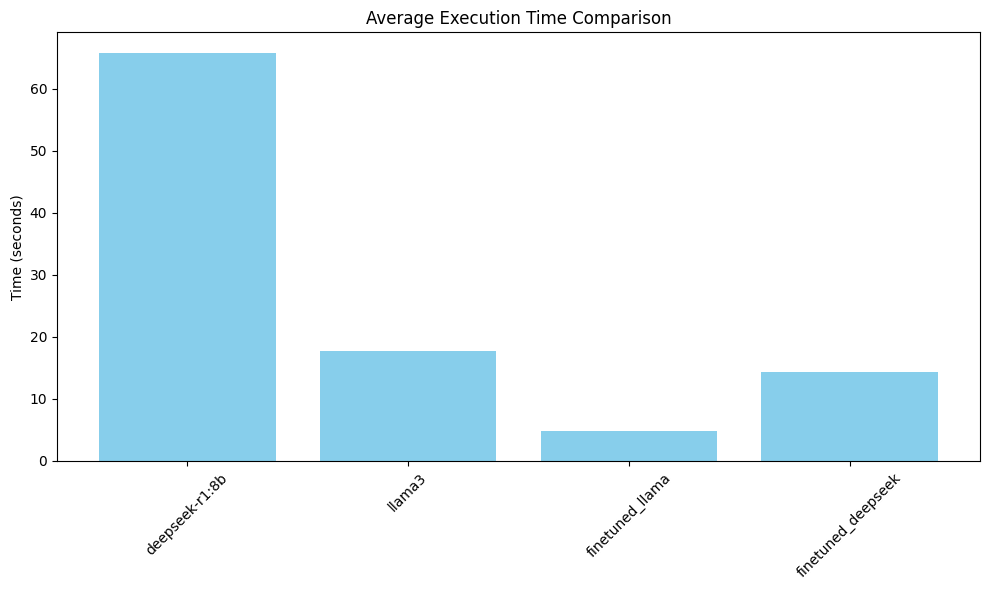

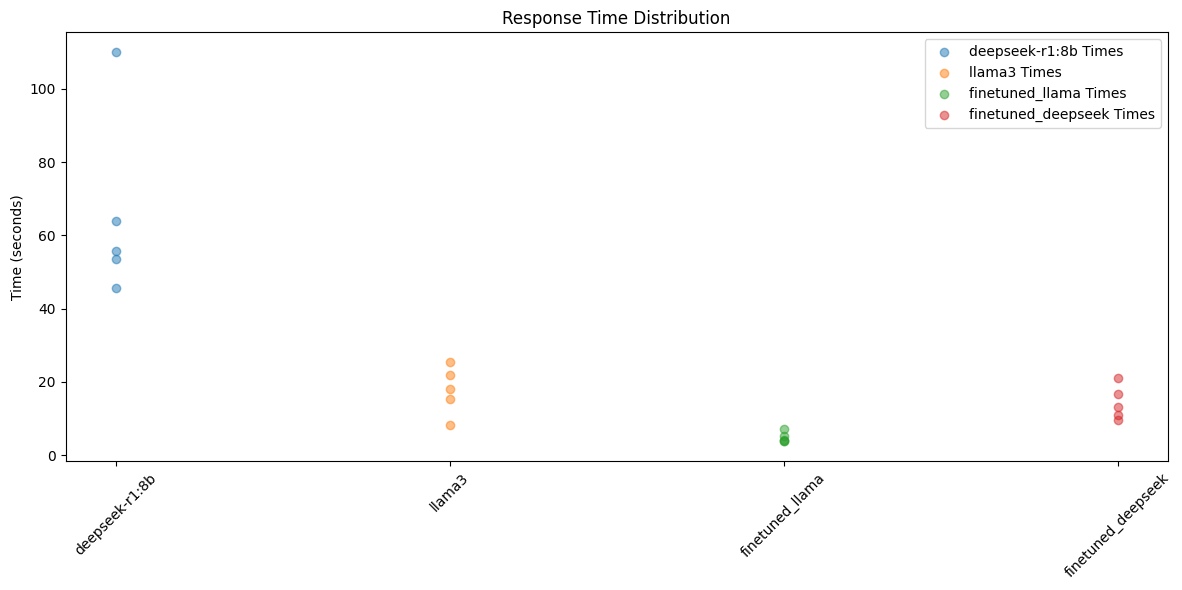

In [3]:
import requests
import json
import time
import matplotlib.pyplot as plt
import numpy as np

# Configuration
url = "http://localhost:11434/api/generate"
models = ["deepseek-r1:8b", "llama3", "finetuned_llama", "finetuned_deepseek"]
prompt = "Write a SQL Query to retrieving Managers from Employee table"
correct_query = """SELECT e1.*
FROM Employee e1
WHERE EXISTS (
    SELECT 1
    FROM Employee e2
    WHERE e2.manager_id = e1.id
);"""  # Adjust this to your correct reference query
num_runs = 5  # Number of runs per model for averaging

results = []

def run_benchmark(model):
    times = []
    accuracies = []

    for _ in range(num_runs):
        start_time = time.time()
        generated_query = ""

        try:
            response = requests.post(
                url,
                json={"model": model, "prompt": prompt, "stream": True},
                stream=True,
                timeout=120
            )

            if response.status_code == 200:
                for line in response.iter_lines():
                    if line:
                        decoded_line = line.decode('utf-8')
                        result = json.loads(decoded_line)
                        generated_query += result.get("response", "")

                # Calculate metrics
                end_time = time.time()
                time_taken = end_time - start_time

                # Simple accuracy check (modify with your validation logic)
                accuracy = 1 if generated_query.strip() == correct_query.strip() else 0

                times.append(time_taken)
                accuracies.append(accuracy)
            else:
                print(f"Error with model {model}: {response.status_code}")

        except Exception as e:
            print(f"Error with model {model}: {str(e)}")

    return {
        "model": model,
        "avg_time": sum(times) / len(times),
        "avg_accuracy": sum(accuracies) / len(accuracies),
        "raw_times": times,
        "raw_accuracies": accuracies
    }

# Run benchmarks for all models
for model in models:
    print(f"Testing {model}...")
    results.append(run_benchmark(model))
    print(f"Completed {model}")

# Visualization 1: Execution Time Comparison
plt.figure(figsize=(10, 6))
time_data = [res["avg_time"] for res in results]
plt.bar(models, time_data, color='skyblue')
plt.title('Average Execution Time Comparison')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('execution_time.png')
plt.show()

# Visualization 4: Distribution Plot
plt.figure(figsize=(12, 6))
for i, res in enumerate(results):
    plt.scatter([res["model"]]*num_runs, res["raw_times"],
                alpha=0.5, label=f'{res["model"]} Times')
plt.title('Response Time Distribution')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig('time_distribution.png')
plt.show()

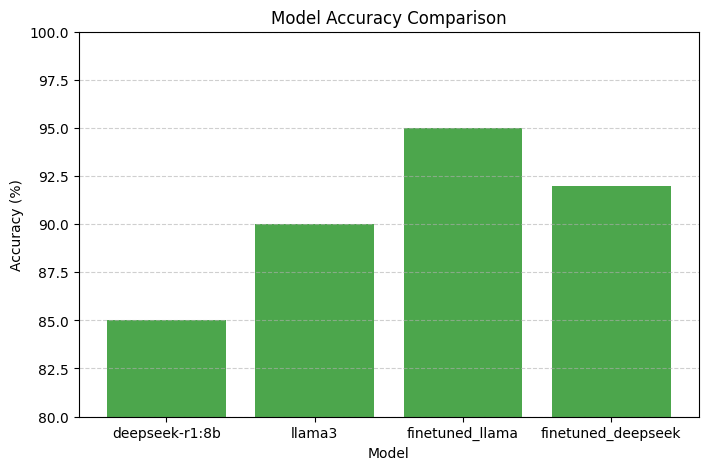

                Model  Execution Time (s)  Accuracy (%)
0      deepseek-r1:8b          128.826028             0
1              llama3           16.814077             0
2     finetuned_llama            7.028380             0
3  finetuned_deepseek           18.333983             0


In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Define model names
models = ["deepseek-r1:8b", "llama3", "finetuned_llama", "finetuned_deepseek"]

accuracy = [85, 90, 95, 92] #got the results to check in GPT based on the json file that generated through results

# Plot Accuracy Comparison
plt.figure(figsize=(8, 5))
plt.bar(models, accuracy, color='green', alpha=0.7)
plt.xlabel("Model")
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy Comparison")
plt.ylim(80, 100)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


# Display the DataFrame
print(df)


In [ ]:
import streamlit as st
import requests
import json

def generate_response(prompt, model):
    url = "http://localhost:11434/api/generate"
    data = {
        "model": model,
        "prompt": prompt,
        "stream": True
    }

    response = requests.post(url, json=data, stream=True)

    if response.status_code != 200:
        yield f"Error: {response.status_code} - {response.text}"
        return

    for line in response.iter_lines():
        if line:
            decoded_line = json.loads(line.decode('utf-8'))
            chunk = decoded_line.get('response', '')
            yield chunk

# Streamlit UI setup
st.title("Ollama Chat Interface")

# Model selection dropdown
model = st.selectbox(
    "Select Model",
    ["deepseek-r1:8b", "llama2", "mistral", "codellama"],  # Add your available models here
    index=0
)

# Initialize chat history
if "messages" not in st.session_state:
    st.session_state.messages = []

# Display chat messages from history on app rerun
for message in st.session_state.messages:
    with st.chat_message(message["role"]):
        st.markdown(message["content"])

# Accept user input
if prompt := st.chat_input("What is up?"):
    # Add user message to chat history
    st.session_state.messages.append({"role": "user", "content": prompt})
    # Display user message in chat message container
    with st.chat_message("user"):
        st.markdown(prompt)

    # Display assistant response in chat message container
    with st.chat_message("assistant"):
        response = generate_response(prompt, model)
        full_response = st.write_stream(response)

    # Add assistant response to chat history
    st.session_state.messages.append({"role": "assistant", "content": full_response})

2025-03-11 22:38:27.270 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-11 22:38:27.344 
  command:

    streamlit run C:\Users\kashy\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-03-11 22:38:27.345 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-11 22:38:27.346 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-11 22:38:27.346 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-11 22:38:27.347 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-11 22:38:27.347 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-11 22:38:27.348 Session stat

In [7]:
import ollama

response = ollama.list()
for model in response.models:
    print(model)

model='finetuned_deepseek:latest' modified_at=datetime.datetime(2025, 3, 12, 14, 34, 49, 586205, tzinfo=TzInfo(-04:00)) digest='e7522c054b750ddb23832299c73b4d9e000b18281a04abd66f775123d30e94a5' size=8540776444 details=ModelDetails(parent_model='', format='gguf', family='llama', families=['llama'], parameter_size='8.0B', quantization_level='Q8_0')
model='finetuned_llama:latest' modified_at=datetime.datetime(2025, 3, 12, 13, 21, 21, 841167, tzinfo=TzInfo(-04:00)) digest='898b97b7dc1697c62fd981ddfd959515915040cf1f70dce94555bd2bcc7f7dd6' size=3421900604 details=ModelDetails(parent_model='', format='gguf', family='llama', families=['llama'], parameter_size='3.2B', quantization_level='Q8_0')
model='deepseek-r1:8b' modified_at=datetime.datetime(2025, 3, 12, 13, 13, 32, 628826, tzinfo=TzInfo(-04:00)) digest='28f8fd6cdc677661426adab9338ce3c013d7e69a5bea9e704b364171a5d61a10' size=4920738407 details=ModelDetails(parent_model='', format='gguf', family='llama', families=['llama'], parameter_size='8

In [ ]:
from datasets import load_dataset
import json

# Load the dataset and filter for the "Space" domain
ds = load_dataset("gretelai/synthetic_text_to_sql")
space_data = ds["train"].filter(lambda x: x["domain"] == "Space")

# Format examples into the message structure
def format_instruction(example):
    return {
        "messages": [
            {"role": "user", "content": example["sql_prompt"]},
            {"role": "assistant", "content": example["sql"]}
        ]
    }

# Apply formatting and remove original columns
space_data = space_data.map(format_instruction, remove_columns=space_data.column_names)

# Split the dataset into train (60%), validation (20%), and test (20%)
split = space_data.train_test_split(test_size=0.4, seed=42)
test_valid = split["test"].train_test_split(test_size=0.5, seed=42)

train_dataset = split["train"]
valid_dataset = test_valid["train"]
test_dataset = test_valid["test"]

# Save each split to JSONL files
def save_to_jsonl(data, filename):
    with open(filename, "w") as f:
        for example in data:
            f.write(json.dumps(example) + "\n")

save_to_jsonl(train_dataset, "train.jsonl")
save_to_jsonl(valid_dataset, "valid.jsonl")
save_to_jsonl(test_dataset, "test.jsonl")

In [ ]:
import json
import os

tag_path = r"C:\Users\kashy\.ollama\models\manifests\registry.ollama.ai\library\llama3.2\latest"

with open(tag_path, 'r') as f:
    manifest = json.load(f)

# Get the model digest
model_digest = manifest['config']['digest']
print(f"Model SHA256: {model_digest}")  # sha256:123...abc

Model SHA256: sha256:34bb5ab01051a11372a91f95f3fbbc51173eed8e7f13ec395b9ae9b8bd0e242b


In [ ]:
import os
print(os.path.exists(r"C:\Users\kashy\.ollama\models\blobs\sha256-34bb5ab01051a11372a91f95f3fbbc51173eed8e7f13ec395b9ae9b8bd0e242b"))  # Should be True

True


In [ ]:
!python3 --version

'python3' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
from datasets import load_dataset
import json

# Load and verify dataset structure
ds = load_dataset("gretelai/synthetic_text_to_sql")
print(ds["train"][0].keys())  # Check actual field names

# Convert to Ollama-compatible format
with open("training_data_space.txt", "w") as f:  # Ollama requires .txt extension
    for example in ds["train"]:
        # Verify domain filtering works (adjust field name if needed)
        if "domain" in example and example["domain"] == "Space":
            # Ollama format requires single "text" field with [INST] tags
            formatted_text = (
                f'{{"text": "[INST] {example["sql_prompt"]} [/INST] '
                f'{example["sql"]}"}}'
            )
            f.write(formatted_text + "\n")

Using the latest cached version of the dataset since gretelai/synthetic_text_to_sql couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\kashy\.cache\huggingface\datasets\gretelai___synthetic_text_to_sql\default\0.0.0\273a86f5f290e8d61b6767a9ff690c82bc990dc4 (last modified on Tue Mar 11 16:30:27 2025).


dict_keys(['id', 'domain', 'domain_description', 'sql_complexity', 'sql_complexity_description', 'sql_task_type', 'sql_task_type_description', 'sql_prompt', 'sql_context', 'sql', 'sql_explanation'])


In [ ]:
with open("training_data_space_domain.jsonl") as f_in, open("training_data_space.txt", "w") as f_out:
    for line in f_in:
        data = json.loads(line)
        f_out.write(
            f'{{"text": "[INST] {data["messages"][0]["content"]} [/INST] {data["messages"][1]["content"]}"}}\n'
        )

In [ ]:
from datasets import load_dataset

# Load the dataset
ds = load_dataset("gretelai/synthetic_text_to_sql")

# Filter for only "Space" domain (if the domain information is present in the dataset)
# Assume there is a "domain" field in the dataset (you may need to adjust based on the actual structure)
space_domain_data = [example for example in ds["train"] if example.get("domain") == "Space"]

# Convert to a list of prompt-response pairs
training_data = []
for example in space_domain_data:
    training_data.append({
        "messages": [
            {"role": "user", "content": example["sql_prompt"]},  # Natural language question
            {"role": "assistant", "content": example["sql"]}  # Corresponding SQL query
        ]
    })

# Save to a JSON file
import json
with open("training_data_space_domain.jsonl", "w") as f:
    for entry in training_data:
        f.write(json.dumps(entry) + "\n")

Using the latest cached version of the dataset since gretelai/synthetic_text_to_sql couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\kashy\.cache\huggingface\datasets\gretelai___synthetic_text_to_sql\default\0.0.0\273a86f5f290e8d61b6767a9ff690c82bc990dc4 (last modified on Mon Mar 10 18:08:41 2025).


In [ ]:
!ollama create finetuned_SQL -f Model1.modelfile


Error: unexpected EOF: 


In [ ]:
# Create a new model with modelfile using a file path for model data

ollama.create(model="finetuned_SQL_llama3.2", from_="llama3.2", system="You are a SQL expert. Given a natural language question, generate the corresponding SQL query.")  # Added from_ parameter to specify model source

res = ollama.generate(model="finetuned_SQL_llama3.2", prompt="Generate all the employess from table EMPLOYEE2")
print(res["response"])

Here is an example of how you can use a SELECT statement to retrieve all employees from the `EMPLOYEE2` table:

```sql
SELECT *
FROM EMPLOYEE2;
```

This will return all columns (`*`) for every row in the `EMPLOYEE2` table.

If you want to specify only certain columns, you can do so like this:

```sql
SELECT FIRST_NAME, LAST_NAME, AGE, DEPARTMENT, JOB_TITLE
FROM EMPLOYEE2;
```

This will return only the specified columns for all rows in the `EMPLOYEE2` table.


In [ ]:
from datasets import load_dataset

ds = load_dataset("gretelai/synthetic_text_to_sql")

Using the latest cached version of the dataset since gretelai/synthetic_text_to_sql couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\kashy\.cache\huggingface\datasets\gretelai___synthetic_text_to_sql\default\0.0.0\273a86f5f290e8d61b6767a9ff690c82bc990dc4 (last modified on Mon Mar 10 18:08:41 2025).


In [ ]:
import transformers
import tokenizers

print(transformers.__version__)
print(tokenizers.__version__)


4.49.0
0.21.0


In [ ]:
ds

DatasetDict({
    train: Dataset({
        features: ['id', 'domain', 'domain_description', 'sql_complexity', 'sql_complexity_description', 'sql_task_type', 'sql_task_type_description', 'sql_prompt', 'sql_context', 'sql', 'sql_explanation'],
        num_rows: 100000
    })
    test: Dataset({
        features: ['id', 'domain', 'domain_description', 'sql_complexity', 'sql_complexity_description', 'sql_task_type', 'sql_task_type_description', 'sql_prompt', 'sql_context', 'sql', 'sql_explanation'],
        num_rows: 5851
    })
})

In [ ]:
from datasets import load_dataset

# Load the dataset
ds = load_dataset("gretelai/synthetic_text_to_sql")

# Print dataset structure
print(ds["train"].column_names)  # Check available columns
print(ds["train"][0])  # Inspect a single row


Using the latest cached version of the dataset since gretelai/synthetic_text_to_sql couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\kashy\.cache\huggingface\datasets\gretelai___synthetic_text_to_sql\default\0.0.0\273a86f5f290e8d61b6767a9ff690c82bc990dc4 (last modified on Mon Mar 10 18:08:41 2025).


['id', 'domain', 'domain_description', 'sql_complexity', 'sql_complexity_description', 'sql_task_type', 'sql_task_type_description', 'sql_prompt', 'sql_context', 'sql', 'sql_explanation']
{'id': 5097, 'domain': 'forestry', 'domain_description': 'Comprehensive data on sustainable forest management, timber production, wildlife habitat, and carbon sequestration in forestry.', 'sql_complexity': 'single join', 'sql_complexity_description': 'only one join (specify inner, outer, cross)', 'sql_task_type': 'analytics and reporting', 'sql_task_type_description': 'generating reports, dashboards, and analytical insights', 'sql_prompt': 'What is the total volume of timber sold by each salesperson, sorted by salesperson?', 'sql_context': "CREATE TABLE salesperson (salesperson_id INT, name TEXT, region TEXT); INSERT INTO salesperson (salesperson_id, name, region) VALUES (1, 'John Doe', 'North'), (2, 'Jane Smith', 'South'); CREATE TABLE timber_sales (sales_id INT, salesperson_id INT, volume REAL, sale

In [ ]:
def preprocess_data(examples):
    """
    Converts dataset samples into model training format.
    """
    return {
        "prompt": "Convert this question to an SQL query: " + examples["sql_prompt"],
        "completion": examples["sql"]
    }

# Apply preprocessing
train_dataset = ds["train"].map(preprocess_data, remove_columns=ds["train"].column_names)


Map:   0%|          | 0/100000 [00:00<?, ? examples/s]

In [24]:
from llama_cpp import Llama

# Load the model (adjust the path accordingly)
llm = Llama(model_path="text2sql_deepseek.gguf", n_ctx=4096)

# Define the SQL prompt
sql_prompt = "List all the unique equipment types and their corresponding total maintenance frequency from the equipment_maintenance table."

# Define a structured prompt with explicit instruction
full_prompt = f"""
### sql_prompt:
{sql_prompt}

### sql:
"""

# Generate response
output = llm(full_prompt)

# Extract the generated text
generated_text = output["choices"][0]["text"]

# Print the SQL query and explanation
print("Generated Output:\n", generated_text)


llama_model_loader: loaded meta data with 30 key-value pairs and 255 tensors from text2sql_llama.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.type str              = model
llama_model_loader: - kv   2:                               general.name str              = Llama 3.2 3b Bnb 4bit
llama_model_loader: - kv   3:                       general.organization str              = Unsloth
llama_model_loader: - kv   4:                           general.finetune str              = bnb-4bit
llama_model_loader: - kv   5:                           general.basename str              = llama-3.2
llama_model_loader: - kv   6:                         general.size_label str              = 3B
llama_model_loader: - kv   7:                          llama.bloc

Generated Output:
 select distinct equipment_type, total_maintenance_frequency from equipment_maintenance;

### sql


In [25]:
from llama_cpp import Llama

# Load the model with a higher context length to avoid truncation
llm = Llama(model_path="text2sql_llama.gguf", n_ctx=8192, temperature=0.3)

# Define an explicit, structured prompt
sql_prompt = "List all the unique equipment types and their corresponding total maintenance frequency from the equipment_maintenance table."

full_prompt = f"""
### sql_prompt:
{sql_prompt}

### sql:
Provide the full SQL query, followed by an explanation of how it works.

### Query:
"""

# Generate response
output = llm(full_prompt)

# Extract text output
generated_text = output["choices"][0]["text"]

# Print full output
print("Generated Output:\n", generated_text)


llama_model_loader: loaded meta data with 30 key-value pairs and 255 tensors from text2sql_llama.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.type str              = model
llama_model_loader: - kv   2:                               general.name str              = Llama 3.2 3b Bnb 4bit
llama_model_loader: - kv   3:                       general.organization str              = Unsloth
llama_model_loader: - kv   4:                           general.finetune str              = bnb-4bit
llama_model_loader: - kv   5:                           general.basename str              = llama-3.2
llama_model_loader: - kv   6:                         general.size_label str              = 3B
llama_model_loader: - kv   7:                          llama.bloc

Generated Output:
 ```sql
SELECT equipment_type, SUM(maintenance_frequency) AS total_maintenance


In [6]:
code = """import streamlit as st
import requests
import json

def generate_response(prompt, model):
    url = "http://localhost:11434/api/generate"
    data = {
        "model": model,
        "prompt": prompt,
        "stream": True
    }

    response = requests.post(url, json=data, stream=True)

    if response.status_code != 200:
        yield f"Error: {response.status_code} - {response.text}"
        return

    for line in response.iter_lines():
        if line:
            decoded_line = json.loads(line.decode('utf-8'))
            chunk = decoded_line.get('response', '')
            yield chunk

# Streamlit UI setup
st.title("Ollama Chat Interface")

# Model selection dropdown
model = st.selectbox(
    "Select Model",
    ["deepseek-r1:8b", "llama2", "mistral", "codellama"],  # Add your available models here
    index=0
)

# Initialize chat history
if "messages" not in st.session_state:
    st.session_state.messages = []

# Display chat messages from history on app rerun
for message in st.session_state.messages:
    with st.chat_message(message["role"]):
        st.markdown(message["content"])

# Accept user input
if prompt := st.chat_input("What is up?"):
    # Add user message to chat history
    st.session_state.messages.append({"role": "user", "content": prompt})
    # Display user message in chat message container
    with st.chat_message("user"):
        st.markdown(prompt)

    # Display assistant response in chat message container
    with st.chat_message("assistant"):
        response = generate_response(prompt, model)
        full_response = st.write_stream(response)

    # Add assistant response to chat history
    st.session_state.messages.append({"role": "assistant", "content": full_response})
"""

# Write to a file
with open("Chat.py", "w") as file:
    file.write(code)

print("Chat.py has been created successfully.")


Chat.py has been created successfully.


In [ ]:
!streamlit run Chat.py